# Додаткові завдання №5

## 1 Задача 1.10.10
Випадкова величина $\xi$ має щiльнiсть $p(x) = e^{-2 |x|}$.
Обчислити
1. $\mathsf{P}(\xi < 1)$;
2. $\mathsf{P}(\xi < 3|\xi \geq 2)$;
3. $\mathsf{E}\xi, \mathsf{D}\xi$.

### 1.1 Завдання 1
Реалізуйте випадкову величину $\xi$ за допомогою класу [scipy.stats.rv_continuous](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_continuous.html).

In [1]:
# Місце для Вашого коду

from scipy.stats import rv_continuous

import numpy as np

class new_rv(rv_continuous):
    def _pdf(self, x):
        return np.exp(-2 * np.abs(x))
rv = new_rv()

### 1.2 Завдання 2
Зобразіть графічно функцію щільності та функцію розподілу отриманої випадкової величини.

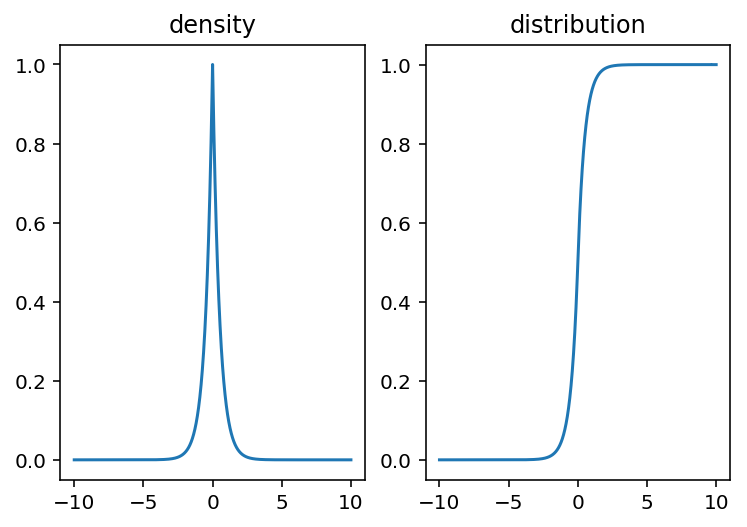

In [3]:
# Місце для Вашого коду

import matplotlib.pyplot as plt
%matplotlib inline

x = np.arange(-10, 10.01, 0.01)

y1 = rv.pdf(x)
y2 = rv.cdf(x)

plt.subplot(1, 2, 1, title='density')
plt.plot(x, y1)
plt.subplot(1, 2, 2, title='distribution')
plt.plot(x, y2)
plt.show()

### 1.3 Завдання 3
Розв'яжіть задачу за допомогою отриманої випадкової величини та порівняйте результати з теоретично розрахованими.

In [5]:
# Місце для Вашого коду

print(f"task 1: {rv.cdf(1)}")
tmp = (rv.cdf(3) - rv.cdf(2)) / (1 - rv.cdf(2))
print(f'task 2: {tmp}')

print(f'De = {rv.expect(lambda x: x**2) - rv.expect(lambda x: x) ** 2}')

task 1: 0.9323323583816931
task 2: 0.8646647167632358
De = 0.49999999999999994


## 2 Апроксимація числа $\pi$ (задача Бюффона)

Розглянемо дві паралельні прямі на площині, відстань між якими дорівнює $1$. Не втрачаючи загальності, нехай ці прямі задаються рівностями $y = 0$ та $y = 1$. Кинемо на цю площину голку довжиною $1$ так, що координата по осі $y$ її середини рівномірно розподілена на $[0,1]$, а кут між голкою та віссю $x$ (додатною піввіссю $x$) рівномірно розподілений на $[0, \pi]$. Тоді ймовірність того, що голка перетне будь-яку з паралельних прямих, дорівнює $2/\pi$.

Реалізуйте функцію емпіричної апроксимації числа $\pi$ за $n$ симуляцій (кидання $n$ голок). Зобразіть графічно отримані елементи: паралельні прямі та всі голки. Виділіть точки, що належать колу, окремим кольором від інших точок.

Виведіть результат функції для:
1. $n = 10$
2. $n = 100$
3. $n = 500$
4. $n = 1000$

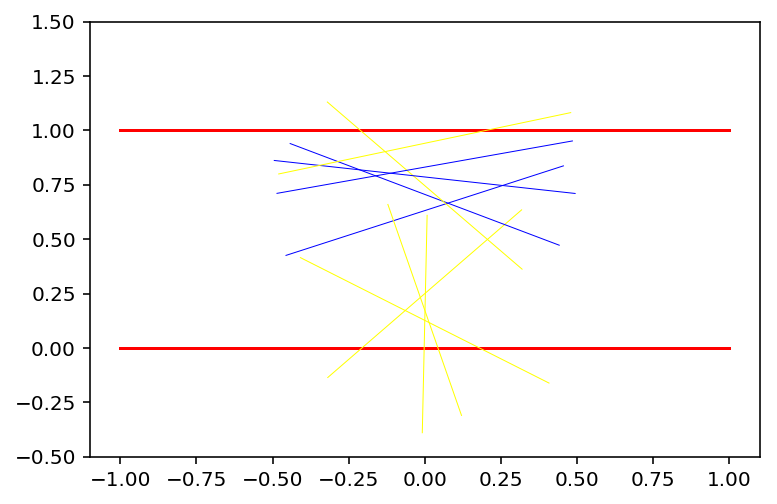

n: 10, pi approx: 3.3333333333333335


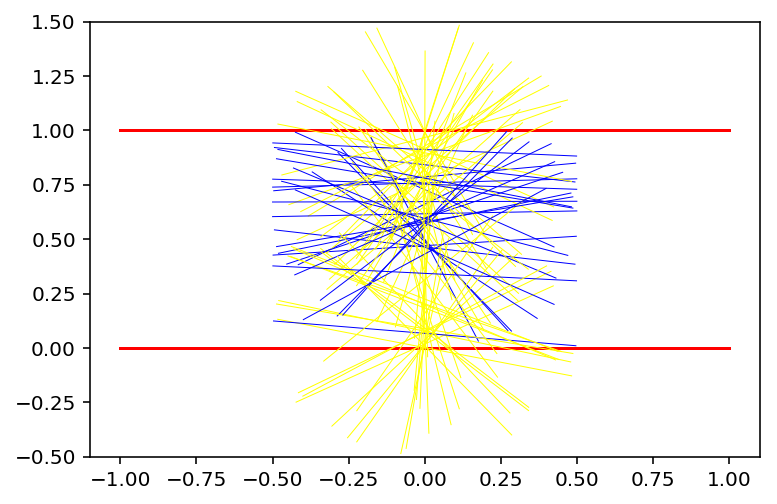

n: 100, pi approx: 2.857142857142857


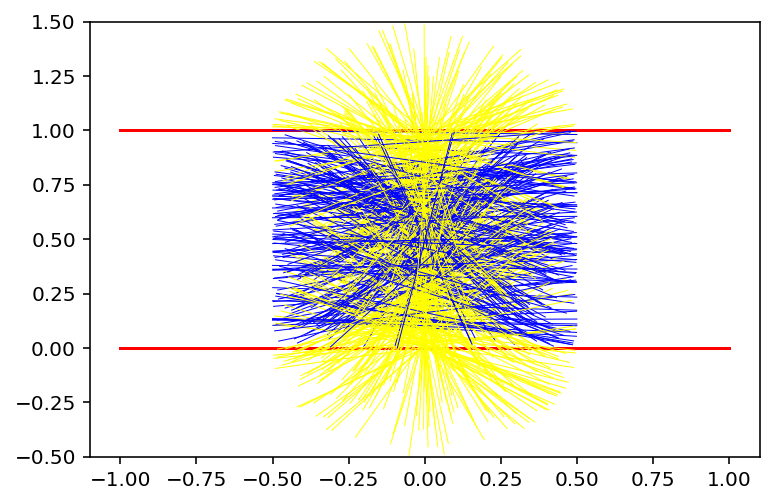

n: 500, pi approx: 3.236245954692557


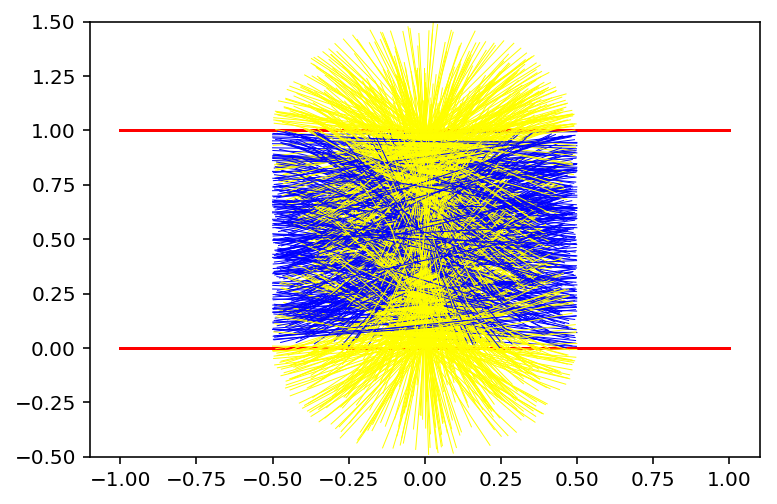

n: 1000, pi approx: 3.067484662576687


In [18]:
from scipy.stats import uniform
def task3(n):
    ress = 0
    plt.plot((-1, 1), (0, 0), 'r')
    plt.plot((-1, 1), (1, 1), 'r')
    for i in range(n):
        y = uniform.rvs(loc=0, scale=1, size=1)
        phi = uniform.rvs(loc=0, scale=np.pi, size=1)
        y1 = y + 0.5 * np.sin(phi)
        y2 = y - 0.5 * np.sin(phi)
        x1 = 0.5 * np.cos(phi)
        x2 = -0.5 * np.cos(phi)
        if y1 >= 1 or y2 <= 0:
            ress += 1
            plt.plot((x1, x2), (y1, y2), linewidth=0.5, color='yellow')
        else:
            plt.plot((x1, x2), (y1, y2), linewidth=0.5, color='blue')
    pi = 2/(ress/n)
    plt.axis((-1.1, 1.1, -0.5, 1.5))
    plt.show()
    return pi
for n in (10, 100, 500, 1000):
    print(f"n: {n}, pi approx: {task3(n)}")